<a href="https://colab.research.google.com/github/ahdonjuan/r-basic/blob/master/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.6 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62829 sha256=2e031483be3f8ca5505554840d78de71ceab267ecb87dbad1800688caeda5bda
  Stored in directory: /root/.cache/pip/wheels/84/0c/fc/b68506eda40cccaeb0013be550ba904d253ec90eae2b156052
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24450 sha256=08be95c24ef3aedc2c98f2065beeb14610b79bdd9fc6d34160cca6a80cbf0b16
  Stored in directory: /root/.cache/pip/wheels/32/d9/4f/360d4b0b9ec7c65583ec7c8e72fd2158c97ad04fbcb932891c
Successfully built py_vollib py_lets_be_rational


In [ ]:
import numpy as np
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs

# Definir variables
r = 0.11
S = 90
K = 100
T = 3/12
sigma = 0.20

def calcularBlackScholes(r, S, K, T, sigma):
    "Calcular precios BS de call y put"
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    precio_call = S * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1)
    precio_put = K * np.exp(-r * T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)

    precio_call_bs = bs('c', S, K, T, r, sigma)
    precio_put_bs = bs('p', S, K, T, r, sigma)

    return d1, d2, precio_call, precio_put, precio_call_bs, precio_put_bs

# Calcular y mostrar los resultados
d1, d2, call_precio, put_precio, call_precio_bs, put_precio_bs = calcularBlackScholes(r, S, K, T, sigma)

print(f"d1: {d1}")
print(f"d2: {d2}")
print(f"Precio del Call (calculado): {call_precio}")
print(f"Precio del Call (py_vollib): {call_precio_bs}")
print(f"Precio del Put (calculado): {put_precio}")
print(f"Precio del Put (py_vollib): {put_precio_bs}")


/usr/local/lib/python3.10/dist-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


d1: -0.7286051565782627
d2: -0.8286051565782627
Precio del Call (calculado): 1.1669964789205878
Precio del Call (py_vollib): 1.166996478920592
Precio del Put (calculado): 8.454464734265983
Precio del Put (py_vollib): 8.454464734265988


In [4]:
# Demostrar la paridad put-call
paridad_call_put = call_precio + K * np.exp(-r * T)
paridad_call_put_bs = call_precio_bs + K * np.exp(-r * T)
paridad_put_call = put_precio + S
paridad_put_call_bs = put_precio_bs + S

print(f"Paridad Call-Put (calculado): {paridad_call_put} = {paridad_put_call}")
print(f"Paridad Call-Put (py_vollib): {paridad_call_put_bs} = {paridad_put_call_bs}")

# Verificación de la paridad put-call
assert np.isclose(paridad_call_put, paridad_put_call), "La paridad put-call no se cumple (calculado)"
assert np.isclose(paridad_call_put_bs, paridad_put_call_bs), "La paridad put-call no se cumple (py_vollib)"
print("La paridad put-call se cumple.")

Paridad Call-Put (calculado): 98.454464734266 = 98.45446473426598
Paridad Call-Put (py_vollib): 98.454464734266 = 98.45446473426598
La paridad put-call se cumple.


In [5]:
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta

In [6]:
# Calcular las griegas
delta_call = delta('c', S, K, T, r, sigma)
delta_put = delta('p', S, K, T, r, sigma)
gamma_call = gamma('c', S, K, T, r, sigma)
gamma_put = gamma('p', S, K, T, r, sigma)
vega_call = vega('c', S, K, T, r, sigma)
vega_put = vega('p', S, K, T, r, sigma)
theta_call = theta('c', S, K, T, r, sigma)
theta_put = theta('p', S, K, T, r, sigma)

In [7]:
# Imprimir las griegas
print(f"Delta Call: {delta_call}")
print(f"Delta Put: {delta_put}")
print(f"Gamma Call: {gamma_call}")
print(f"Gamma Put: {gamma_put}")
print(f"Vega Call: {vega_call}")
print(f"Vega Put: {vega_put}")
print(f"Theta Call: {theta_call}")
print(f"Theta Put: {theta_put}")

Delta Call: 0.2331216116567763
Delta Put: -0.7668783883432237
Gamma Call: 0.03399316351618994
Gamma Put: 0.03399316351618994
Vega Call: 0.13767231224056925
Vega Put: 0.13767231224056925
Theta Call: -0.021058703650256413
Theta Put: 0.008260807330806584


In [23]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put

precio_call = black_scholes_call(S, K, T, r, sigma)
precio_put = black_scholes_put(S, K, T, r, sigma)

print(f"Precio del Call: {precio_call:.2f}")
print(f"Precio del Put: {precio_put:.2f}")

Precio del Call: 1.17
Precio del Put: 8.45


In [15]:
# Paso 5: Cálculo del valor de un call spread
K2 = 100.25  # Strike del segundo call en el spread
precio_call2 = black_scholes_call(S, K2, T, r, sigma)
call_spread = precio_call - precio_call2

print(f"Precio del Call Spread: {call_spread:.2f}")

Precio del Call Spread: 0.05


In [17]:
# Paso 6: Cálculo del valor de una opción binaria cash-or-nothing
def binaria_call_cash_or_nothing(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

precio_binaria = binaria_call_cash_or_nothing(S, K, T, r, sigma)

print(f"Precio de la Opción Binaria: {precio_binaria:.2f}")


Precio de la Opción Binaria: 0.20


Aproximación de la Opción Binaria: -0.03


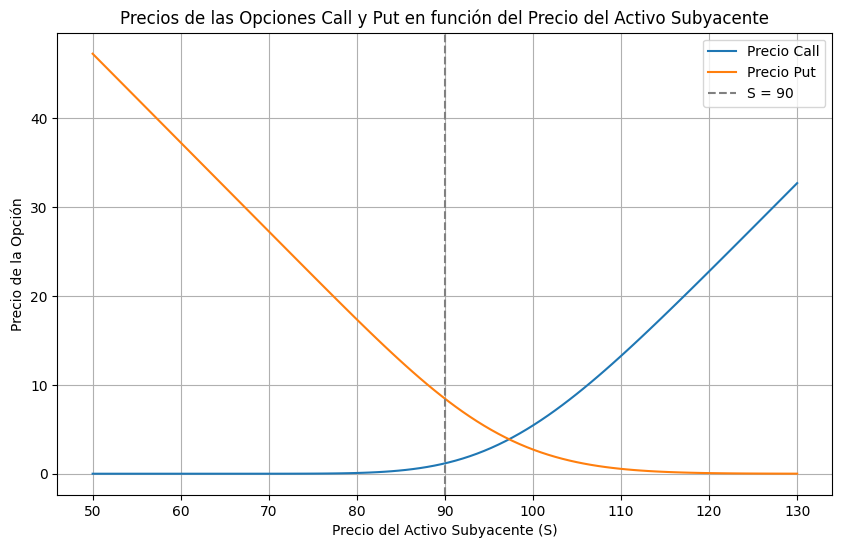

In [27]:
# Paso 7: Aproximación del valor de la opción binaria con la fórmula
import matplotlib.pyplot as plt
def aproximacion_binaria(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    dC_dK = -norm.pdf(d1) / (sigma * S * np.sqrt(T))
    dC_dsigma = S * norm.pdf(d1) * np.sqrt(T)
    d_sigma_dK = 0  # Suponiendo sigma constante respecto a K

    aproximacion = dC_dK + dC_dsigma * d_sigma_dK
    return aproximacion

aproximacion_binaria = aproximacion_binaria(S, K, T, r, sigma)

print(f"Aproximación de la Opción Binaria: {aproximacion_binaria:.2f}")

# Plot de los precios del Call y Put en función del precio del activo subyacente S
precios_subyacente = np.linspace(50, 130, 100)
precios_call = [black_scholes_call(S, K, T, r, sigma) for S in precios_subyacente]
precios_put = [black_scholes_put(S, K, T, r, sigma) for S in precios_subyacente]

plt.figure(figsize=(10, 6))
plt.plot(precios_subyacente, precios_call, label='Precio Call')
plt.plot(precios_subyacente, precios_put, label='Precio Put')
plt.axvline(x=S, color='grey', linestyle='--', label='S = 90')
plt.xlabel('Precio del Activo Subyacente (S)')
plt.ylabel('Precio de la Opción')
plt.title('Precios de las Opciones Call y Put en función del Precio del Activo Subyacente')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Precios de las opciones call y put utilizando el modelo de Black-Scholes
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

# Aproximación numérica de las derivadas parciales
epsilon = 0.001  # Pequeño cambio
delta_S = S * epsilon
delta_T = T * epsilon

# Derivada parcial con respecto al tiempo T
call_price_delta_T = black_scholes_call(S, K, T + delta_T, r, sigma)
put_price_delta_T = black_scholes_put(S, K, T + delta_T, r, sigma)
partial_t = (call_price_delta_T - call_price - put_price_delta_T + put_price) / (2 * delta_T)

# Derivada parcial con respecto al precio del subyacente S (Delta)
call_price_delta_S = black_scholes_call(S + delta_S, K, T, r, sigma)
put_price_delta_S = black_scholes_put(S + delta_S, K, T, r, sigma)
partial_S = (call_price_delta_S - call_price - put_price_delta_S + put_price) / (2 * delta_S)

# Segunda derivada parcial con respecto al precio del subyacente S (Gamma)
call_price_delta_S1 = black_scholes_call(S + delta_S, K, T, r, sigma)
call_price_delta_S2 = black_scholes_call(S - delta_S, K, T, r, sigma)
put_price_delta_S1 = black_scholes_put(S + delta_S, K, T, r, sigma)
put_price_delta_S2 = black_scholes_put(S - delta_S, K, T, r, sigma)

# Derivada parcial con respecto a S nuevamente para obtener la segunda derivada
partial_S2 = (call_price_delta_S1 - 2 * call_price + call_price_delta_S2 - put_price_delta_S1 + 2 * put_price - put_price_delta_S2) / (delta_S ** 2)

# Imprimir las derivadas parciales numéricas
print(f"Derivada parcial con respecto al tiempo T (Theta): {partial_t}")
print(f"Derivada parcial con respecto al precio del subyacente S (Delta): {partial_S}")
print(f"Segunda derivada parcial con respecto al precio del subyacente S (Gamma): {partial_S2}")

Derivada parcial con respecto al tiempo T (Theta): 5.3507371810468385
Derivada parcial con respecto al precio del subyacente S (Delta): 0.49999999999995975
Segunda derivada parcial con respecto al precio del subyacente S (Gamma): -2.1930331350620376e-12
